# A

## 1

Is the customers' contract type related to the churn rate?

## 2

The organization would benefit from this analysis in a few ways. Understanding the impact of the contract types can aid decisions regarding the contracts offered. If a type of contract is linked with a higher churn rate, the organization can consider revising the contract or offer incentives on the contract types that have lower churn. The organization could also begin targeted campaigns or promotions to encourage customers to switch their contracts to mitigate risk. Additionally, once analyzed, it can be incorporated into identifying at-risk customers when combined with further analysis to implement proactive retention.

## 3

Only two columns are required from the dataset to answer our research question: contract and churn.

# B

## 1

See below.

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

# NA filter set to false as only missing values are InternetService "None" which should stay.
df = pd.read_csv("churn_clean.csv", index_col="CaseOrder", na_filter=False)

df.columns = df.columns.str.lower()

# New df for the chi test and set columns as category type
chi_df = df[["churn", "contract"]].astype("category")

# Create contingency table for chi test.
chi_contigency_table = pd.crosstab(chi_df["contract"], chi_df["churn"])

# Perform and store Chi-Square test results
result = chi2_contingency(chi_contigency_table)

print("Statistic:", result.statistic)
print("p-value:", result.pvalue)
print("Degrees of Freedom", result.dof)
print("Expected Frequencies Table:\n", result.expected_freq)

Statistic: 718.5915805949758
p-value: 9.116348157571405e-157
Degrees of Freedom 2
Expected Frequencies Table:
 [[4010.16 1445.84]
 [1544.97  557.03]
 [1794.87  647.13]]


## 2

See above.

## 3

The Chi-Square test was chosen as both columns contract and churn are categorical. This test allows us to identify any association between these two features.

# C

See below.

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: tenure, dtype: float64


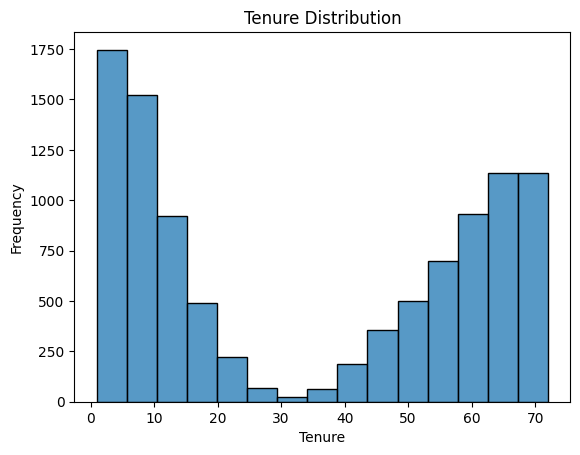

--------------------------------------------------
count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: monthlycharge, dtype: float64


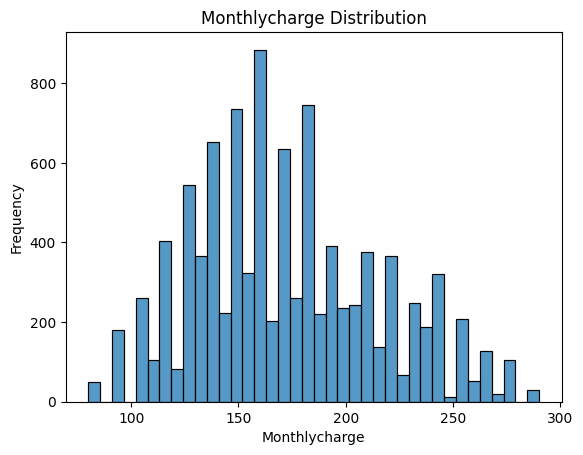

--------------------------------------------------
churn
No     7350
Yes    2650
Name: count, dtype: int64


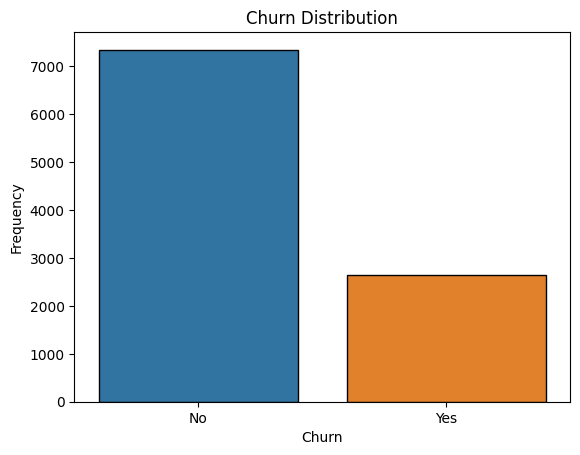

--------------------------------------------------
contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64


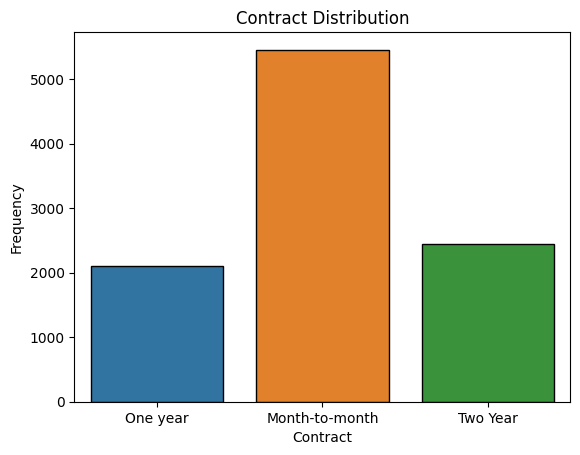

--------------------------------------------------


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

stat_df = df[["tenure", "monthlycharge", "churn", "contract"]]

for col in stat_df:
    plt.figure()
    if df[col].dtype != "object":
        sns.histplot(df[col], edgecolor="black")
        print(df[col].describe())
    else:
        sns.countplot(x=col, data=df, edgecolor="black", hue=col)
        print(df[col].value_counts())
    plt.title(f"{col.title()} Distribution")
    plt.xlabel(col.title())
    plt.ylabel("Frequency")
    plt.show()
    print("-" * 50)

# D

See below.

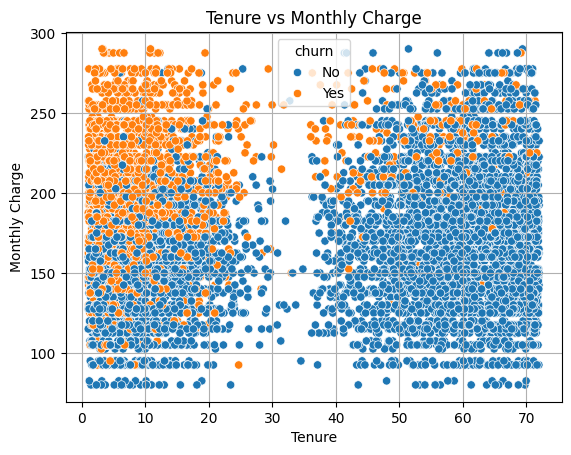

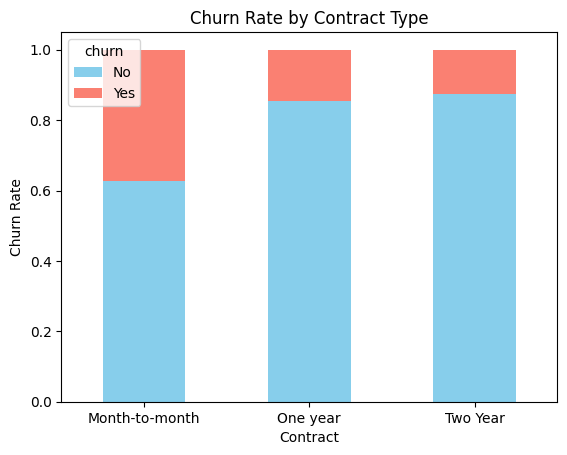

In [6]:
plt.figure()
sns.scatterplot(x="tenure", y="monthlycharge", data=df, hue="churn")
plt.title("Tenure vs Monthly Charge")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charge")
plt.grid(True)
plt.show()

contract_churn = pd.crosstab(stat_df["contract"], stat_df["churn"], normalize="index")
contract_churn.plot(kind="bar", stacked=True, color=["skyblue", "salmon"])
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract")
plt.ylabel("Churn Rate")
plt.xticks(rotation=0)
plt.show()

# E

## 1

Given our question, "Is the customers' contract type related to churn rate?" The null hypothesis would state, “Contract type has no relationship with customer churn rates.” The alternative hypothesis states, “Contract type has a relationship with customer churn rates.” Given that our p-value is essentially zero, 9.116348157571405e-157, we can reject the null hypothesis and accept the alternative. Contract type has a significant relationship with churn rate.

## 2

One of the main limitations of the chi-square test is that it does not identify a causal relationship. The statistical significance reported from the chi-square test indicates that a relationship between contract and churn exists. Another variable not analyzed here could be the influencing factor for contract types and the churn rate, such as income or monthly charges. While contract type could be the driving factor for churn rate, a more detailed analysis is required to identify this (University of Utah, n.d.).

## 3

Further analysis should be conducted on the relationship between contract type and churn to validate the relationship and establish causality. Additionally, the remaining features in the dataset should be examined for their influence on churn rates. A comprehensive analysis is crucial; otherwise, the organization risks only addressing the symptom rather than the root cause of churn.

# G

No third-party code segments were used.

# H

University of Utah. (n.d.). Chi-Square. Department of Sociology. Retrieved June 13, 2024, from https://soc.utah.edu/sociology3112/chi-square.php
